# Capstone 2 - Baseball Stat Projections - Exploratory Data Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
data_path = "/Users/joeboardman/Documents/Springboard/GitHub/Capstone-Two/data/"
fig_save_path = "/Users/joeboardman/Documents/Springboard/GitHub/Capstone-Two/figures/"
os.chdir(data_path)
print(os.getcwd())


/Users/joeboardman/Documents/Springboard/GitHub/Capstone-Two/data


In [3]:
df = pd.read_csv('df_eda.csv', index_col=0)
df.head()

player_id  year    g     ab      r      h  double  triple    hr    rbi  \
4   abbotku01  1996  109  320.0   37.0   81.0    18.0     7.0   8.0   33.0   
5   abbotku01  1997   94  252.0   35.0   69.0    18.0     2.0   6.0   30.0   
6   abbotku01  1999   96  286.0   41.0   78.0    17.0     2.0   8.0   41.0   
13  abreubo01  2000  154  576.0  103.0  182.0    42.0    10.0  25.0   79.0   
14  abreubo01  2001  162  588.0  118.0  170.0    48.0     4.0  31.0  110.0   

    ...  g_2b_prev_2  g_3b_prev_2  g_ss_prev_2  g_of_prev_2  g_dh_prev_2  \
4   ...          0.0          0.0        107.0          0.0          0.0   
5   ...         10.0         16.5         79.5          0.0          0.0   
6   ...         37.0         18.5         25.5          5.0          0.0   
13  ...          0.0          0.0          0.0        146.0          2.5   
14  ...          0.0          0.0          0.0        149.0          2.5   

    power  speed  contact  lucky_1  lucky_2  
4       0      0        0        1        1  
5       0      0        0        1        1  
6       0      0        0        1        1  
13      0      0        1        1        1  
14      0      0        1        1        1  

[5 rows x 114 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6062 entries, 4 to 9106
Columns: 114 entries, player_id to lucky_2
dtypes: float64(85), int64(28), object(1)
memory usage: 5.3+ MB


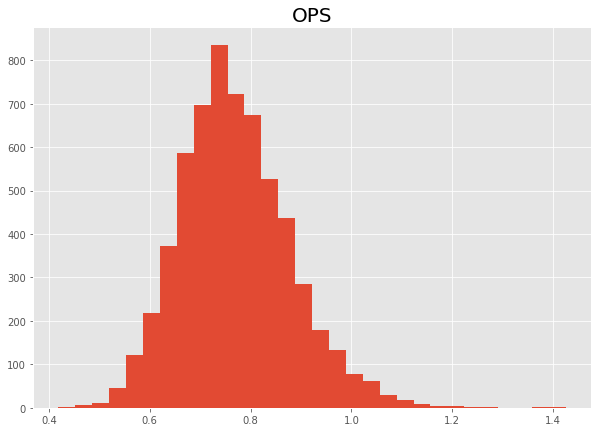

In [5]:
#plot distribution of response variable
fig_hist = plt.figure(figsize=(10,7))
plt.hist(df['ops'], bins=30)
plt.title('OPS', fontsize=20)
plt.show()
fig_hist.savefig(fig_save_path + 'OPS_hist.png')

In [6]:
#group by mean OPS by year
df_season = df.groupby(['season'])[['ops', 'iso', 'wRAA', 'XBA%', 'h', 'hr', 'double', 'ab', 'g', 
                                    'sb', 'avg']].mean()


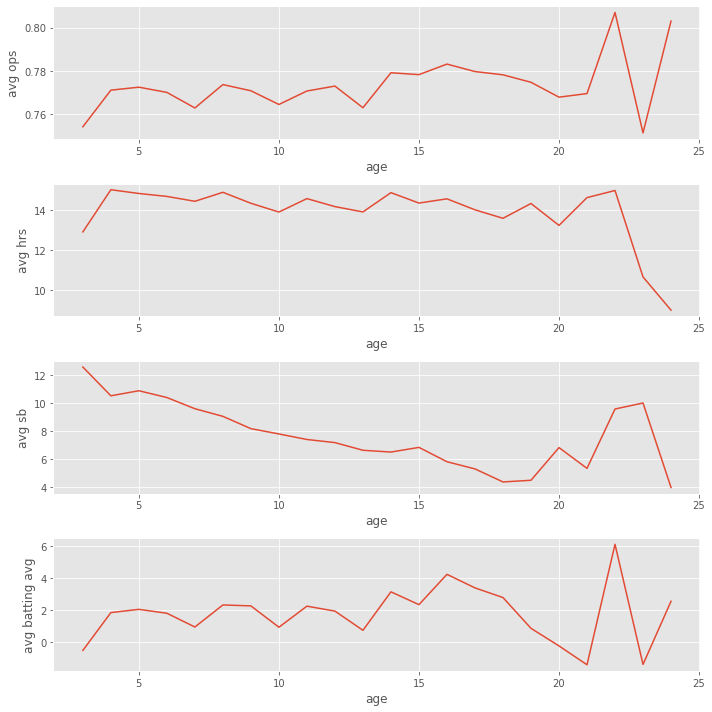

In [7]:
# Plot the league average aging trend for different statistics 

plt.figure(figsize=(10,10))

plt.subplot(4,1,1)
plt.plot(df_season.index, df_season.ops)
plt.xlabel('age')
plt.ylabel('avg ops')

plt.subplot(4,1,2)
plt.plot(df_season.index, df_season.hr)
plt.xlabel('age')
plt.ylabel('avg hrs')

plt.subplot(4,1,3)
plt.plot(df_season.index, df_season.sb)
plt.xlabel('age')
plt.ylabel('avg sb')

plt.subplot(4,1,4)
plt.plot(df_season.index, df_season.wRAA)
plt.xlabel('age')
plt.ylabel('avg batting avg')

plt.tight_layout()
plt.show()
plt.close()

In [8]:
df_type = df.groupby(['player_id'])[['power', 'contact', 'speed']].mean()
df2 = df.merge(df_type, on='player_id')
df2.rename({'power_y':'power_career', 'contact_y':'contact_career', 'speed_y':'speed_career'}, inplace=True, axis=1)
df2

player_id  year    g     ab      r      h  double  triple    hr    rbi  \
0     abbotku01  1996  109  320.0   37.0   81.0    18.0     7.0   8.0   33.0   
1     abbotku01  1997   94  252.0   35.0   69.0    18.0     2.0   6.0   30.0   
2     abbotku01  1999   96  286.0   41.0   78.0    17.0     2.0   8.0   41.0   
3     abreubo01  2000  154  576.0  103.0  182.0    42.0    10.0  25.0   79.0   
4     abreubo01  2001  162  588.0  118.0  170.0    48.0     4.0  31.0  110.0   
...         ...   ...  ...    ...    ...    ...     ...     ...   ...    ...   
6057  zobribe01  2011  156  588.0   99.0  158.0    46.0     6.0  20.0   91.0   
6058  zobribe01  2012  157  560.0   88.0  151.0    39.0     7.0  20.0   74.0   
6059  zobribe01  2013  157  612.0   77.0  168.0    36.0     3.0  12.0   71.0   
6060  zobribe01  2014  146  570.0   83.0  155.0    34.0     3.0  10.0   52.0   
6061  zobribe01  2015  126  467.0   76.0  129.0    36.0     3.0  13.0   56.0   

      ...  g_of_prev_2  g_dh_prev_2  power_x  speed_x  contact_x  lucky_1  \
0     ...          0.0          0.0        0        0          0        1   
1     ...          0.0          0.0        0        0          0        1   
2     ...          5.0          0.0        0        0          0        1   
3     ...        146.0          2.5        0        0          1        1   
4     ...        149.0          2.5        0        0          1        1   
...   ...          ...          ...      ...      ...        ...      ...   
6057  ...         90.0          0.5        0        0          0        1   
6058  ...         74.0          1.5        0        0          0        1   
6059  ...         54.5          3.5        0        0          0        0   
6060  ...         56.5          3.0        0        0          0        0   
6061  ...         48.0          5.0        0        0          0        0   

      lucky_2  power_career  contact_career  speed_career  
0           1           0.0        0.000000      0.000000  
1           1           0.0        0.000000      0.000000  
2           1           0.0        0.000000      0.000000  
3           1           0.0        0.384615      0.384615  
4           1           0.0        0.384615      0.384615  
...       ...           ...             ...           ...  
6057        0           0.0        0.000000      0.000000  
6058        1           0.0        0.000000      0.000000  
6059        1           0.0        0.000000      0.000000  
6060        0           0.0        0.000000      0.000000  
6061        0           0.0        0.000000      0.000000  

[6062 rows x 117 columns]

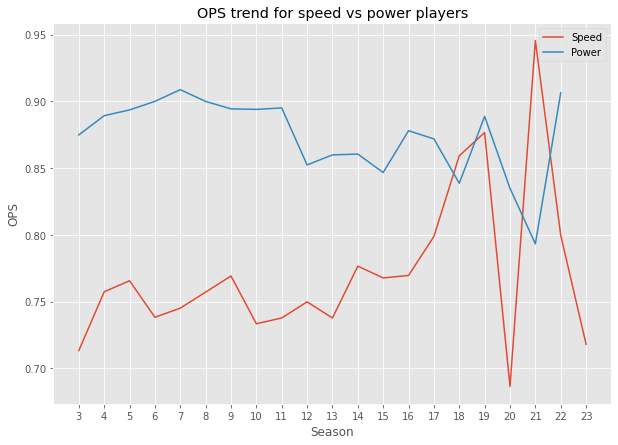

In [9]:
# Plot OPS trend for players categorized as 'speed' vs 'power' players
df_speed = df2[df2.speed_career > 0.25]
df_power = df2[df2.power_career > 0.25]
df_speed = df_speed.groupby(['season'])[['ops', 'iso', 'wRAA', 'XBA%', 'h', 'hr', 'double', 'ab', 'g', 
                                         'sb', 'avg']].mean()
df_power = df_power.groupby(['season'])[['ops', 'iso', 'wRAA', 'XBA%', 'h', 'hr', 'double', 'ab', 'g', 
                                         'sb', 'avg']].mean()

plt.figure(figsize=(10,7))
plt.plot(df_speed.index, df_speed.ops)
plt.plot(df_power.index, df_power.ops)

plt.title('OPS trend for speed vs power players')
plt.xlabel('Season')
plt.ylabel('OPS')
plt.xticks(df_speed.index)
plt.legend(['Speed', 'Power'])
plt.show()
plt.close()

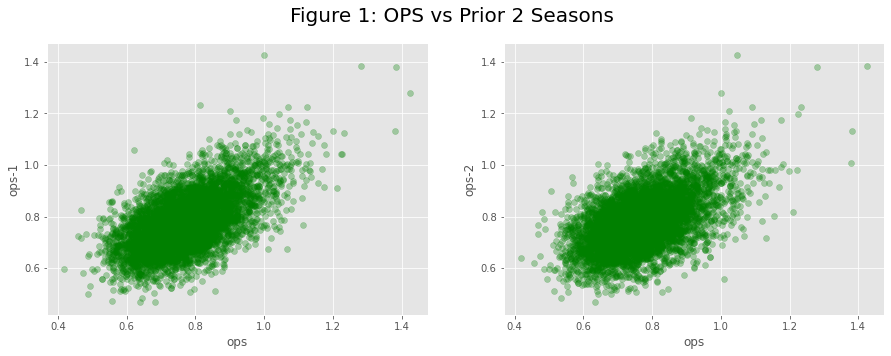

In [10]:
# plotting OPS vs the prior 2 seasons

fig_sub = plt.figure(figsize=(15,5))

fig_sub = plt.subplot(1,2,1)
fig_sub = plt.scatter(df.ops, df.ops_1, alpha=0.3, color='green')
plt.suptitle('Figure 1: OPS vs Prior 2 Seasons', fontsize=20)
plt.xlabel('ops')
plt.ylabel('ops-1')

fig_sub = plt.subplot(1,2,2)
fig_sub = plt.scatter(df.ops, df.ops_2, alpha=0.3, color='green')
plt.xlabel('ops')
plt.ylabel('ops-2')

fig_sub.figure.savefig(fig_save_path + 'ops vs -1 & -2.png')

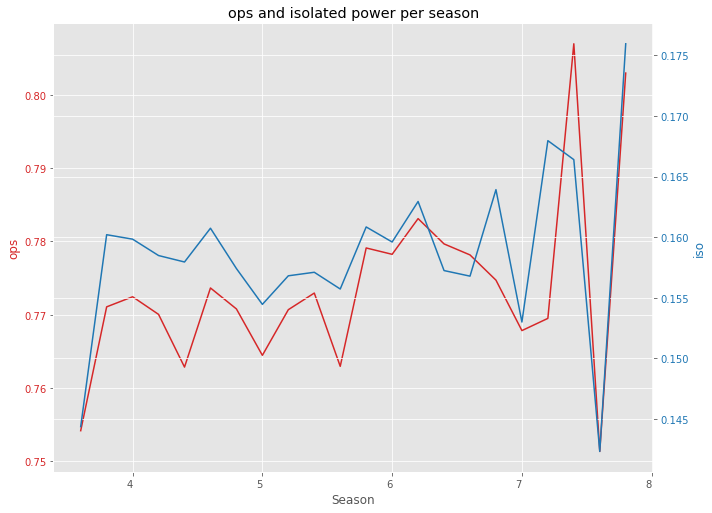

In [11]:
# Show OPS vs ISO with multiple y-axes

fig, ax1 = plt.subplots(figsize=(10,7))

color = 'tab:red'
ax1.set_xlabel('Season')
ax1.set_ylabel('ops', color=color)
ax1.plot(df_season.index, df_season.ops, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(np.arange(3,24), rotation=0, ha='right')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('iso', color=color)
ax2.plot(df_season.index, df_season.iso, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('ops and isolated power per season')
plt.show()
plt.close()

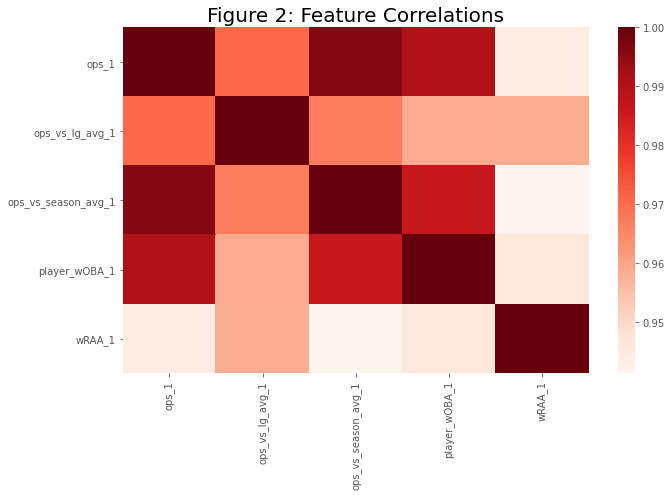

In [12]:
#correlation table

corr_fig = df[['ops_1', 'ops_vs_lg_avg_1', 'ops_vs_season_avg_1', 'player_wOBA_1', 'wRAA_1']].corr()

#heatmap
fig_hmap = plt.figure(figsize=(10,7))
fig_hmap = sns.heatmap(corr_fig, cmap='Reds')
plt.title('Figure 2: Feature Correlations', fontsize=20)
plt.tight_layout()
plt.show()
fig_hmap.figure.savefig(fig_save_path + 'correlations.png')

In [13]:
#Calculate the correlation coefficients
corr = df[['ops', 'bb%', 'k%', 'XBA%']].corr()
corr_viz = corr.round(2).style.background_gradient(cmap='coolwarm')
corr_viz

In [14]:
#Calculate all correlation coefficients
corr_all = df.corr()
corr_viz_all = corr_all.round(2).style.background_gradient(cmap='coolwarm')
corr_viz_all

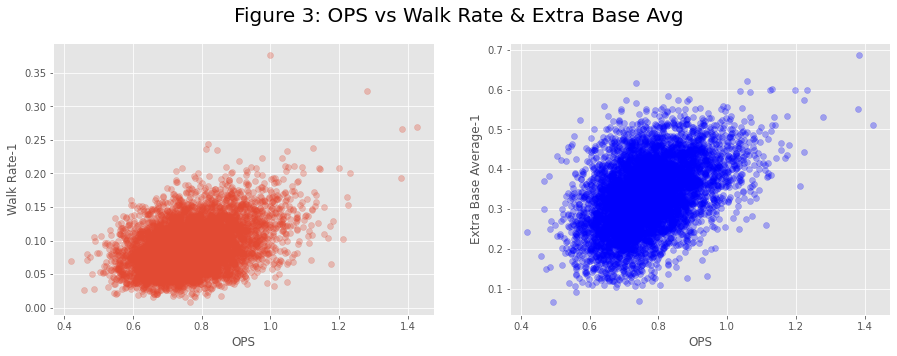

In [15]:
fig_ratio = plt.figure(figsize=(15,5))

fig_ratio = plt.subplot(1,2,1)
fig_ratio = plt.scatter(df.ops, df['bb%_1'], alpha=0.3)
plt.suptitle('Figure 3: OPS vs Walk Rate & Extra Base Avg', fontsize=20)
plt.xlabel('OPS')
plt.ylabel('Walk Rate-1')

fig_ratio = plt.subplot(1,2,2)
fig_ratio = plt.scatter(df.ops, df['XBA%_1'], alpha=0.3, color='blue')
plt.xlabel('OPS')
plt.ylabel('Extra Base Average-1')

fig_ratio.figure.savefig(fig_save_path + 'ops vs walk rate & XBA.png')

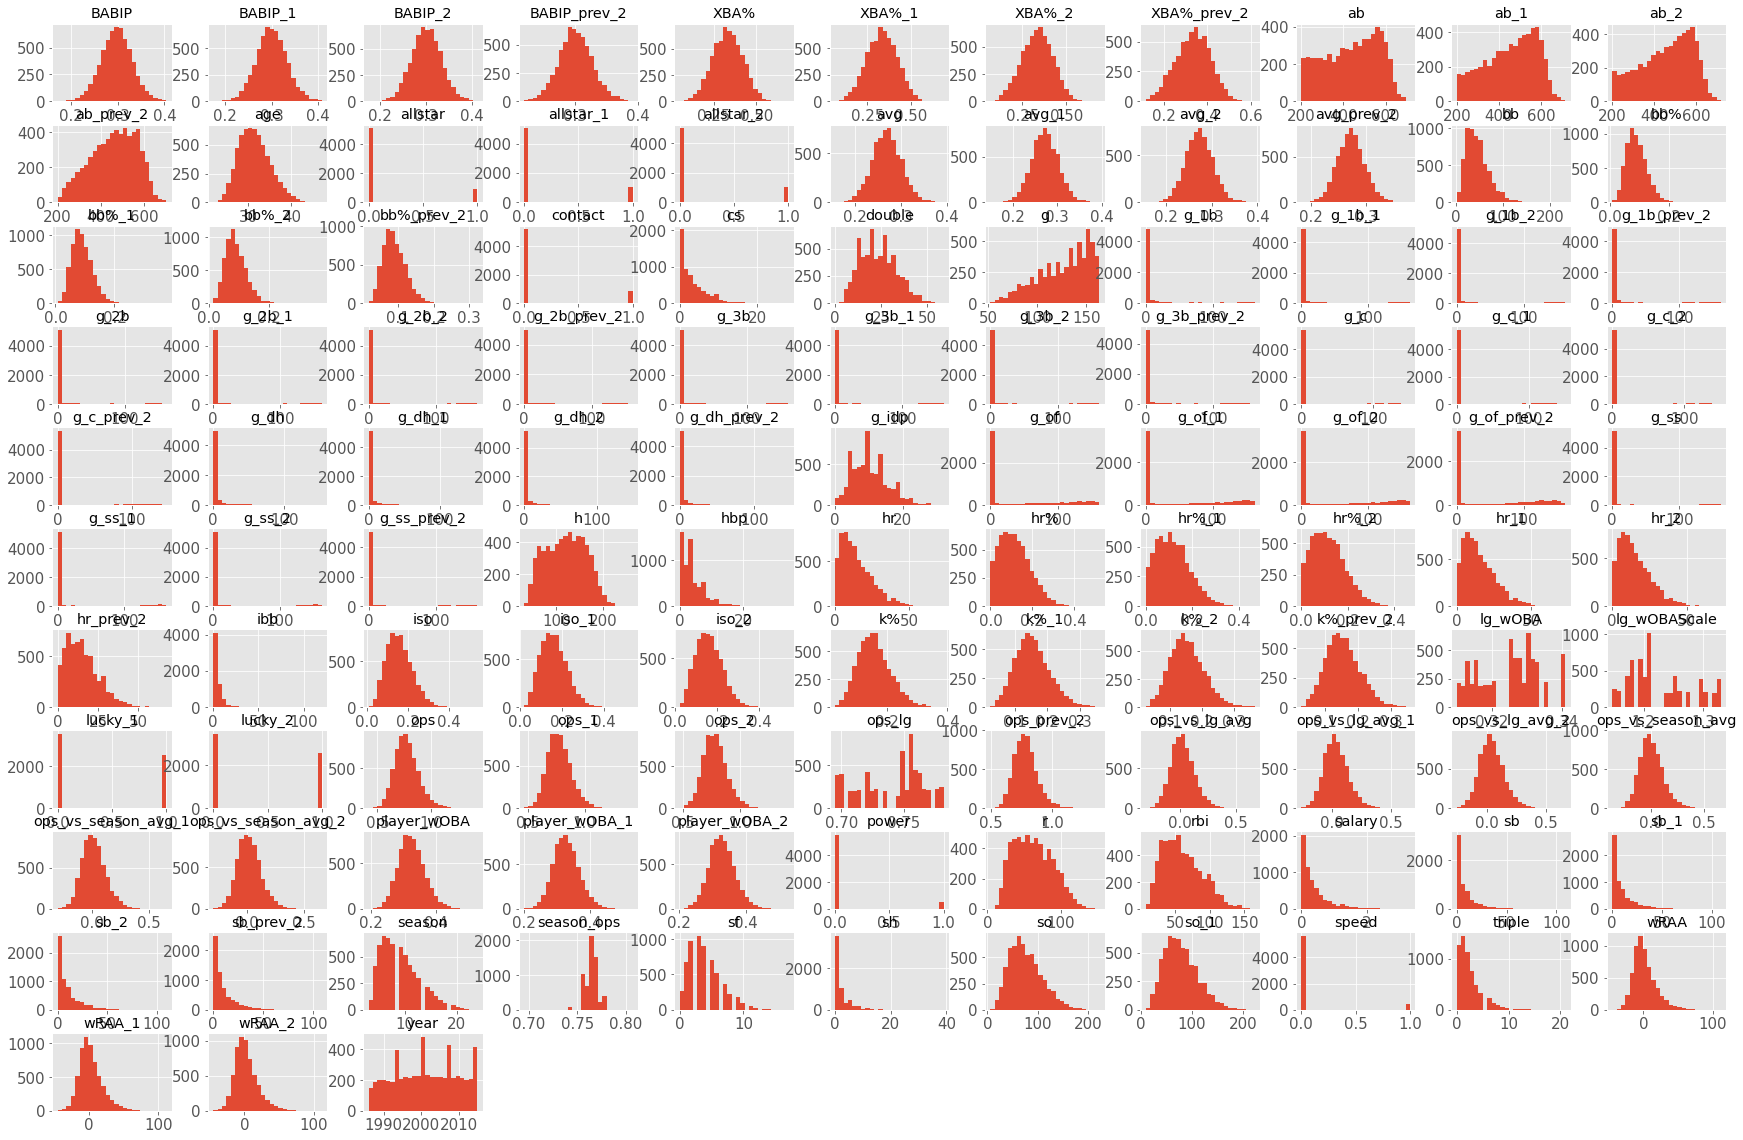

In [16]:
#distribution of all features
df.hist(bins=25, figsize=[30, 20], xlabelsize=15, ylabelsize=15)
plt.show()

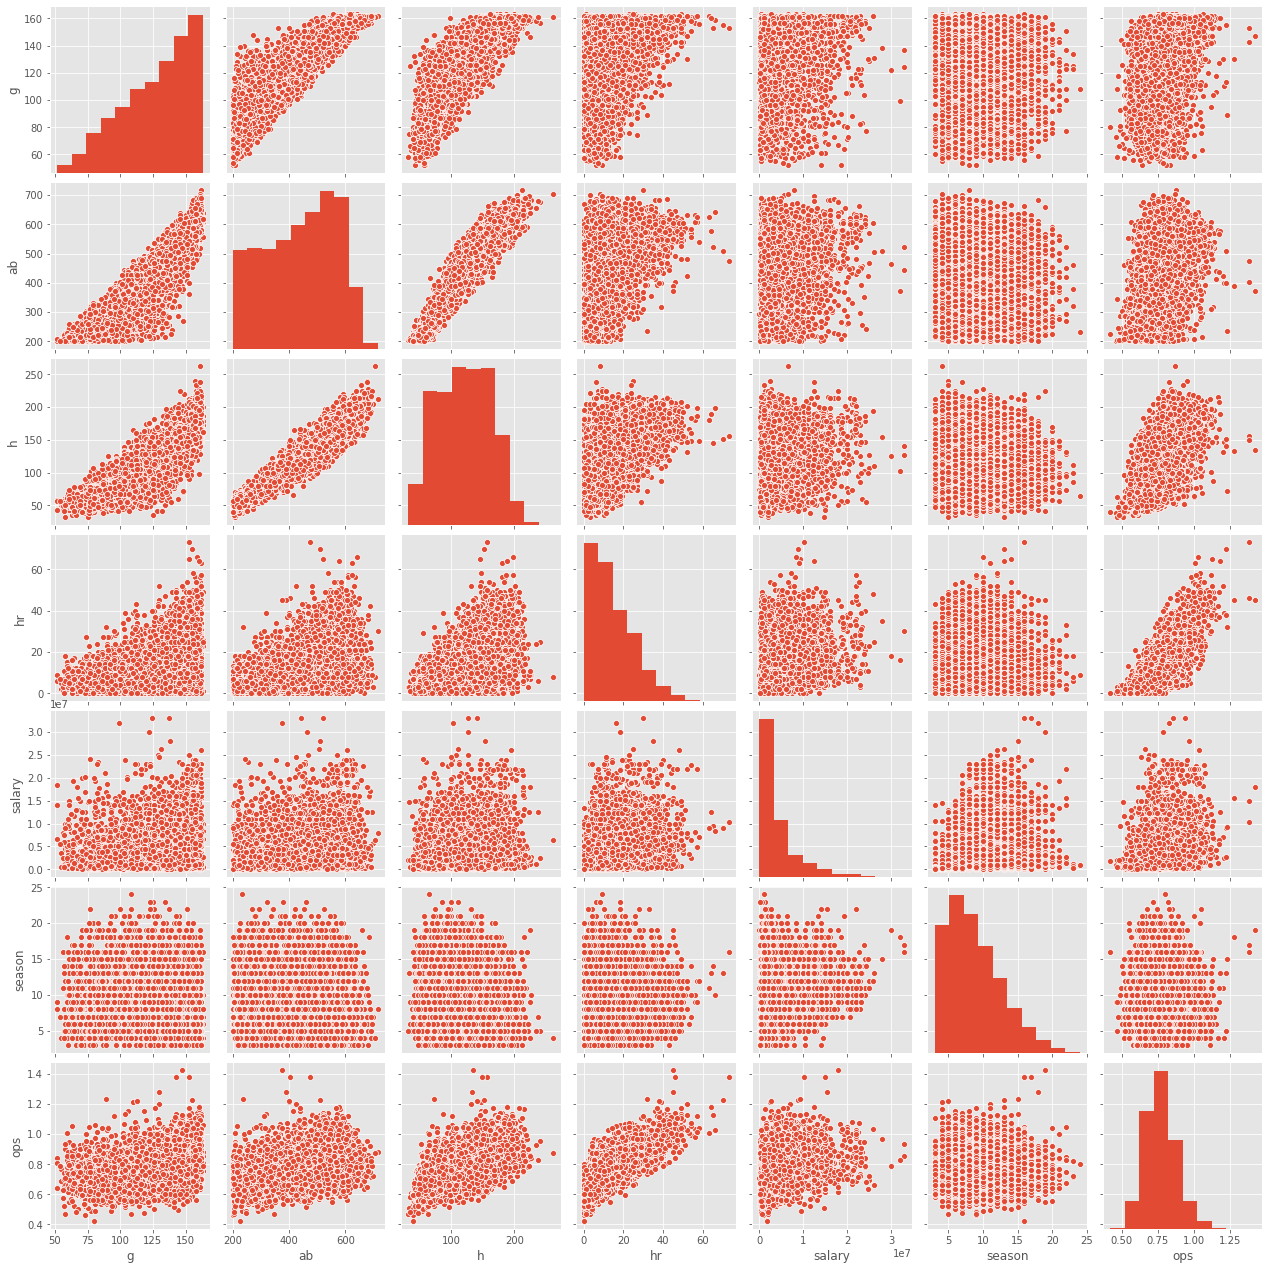

In [17]:
#relationships between key features
df_test = df.groupby(df.index)[['g', 'ab', 'h', 'hr', 'salary', 'season', 'ops']].sum()

pairplot1 = sns.pairplot(df_test)